In [53]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

In [54]:
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]] 
y_data = [[0],[0],[0],[1],[1],[1]]

In [55]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

Hypothesis

In [56]:
# sigmoid function 은 우리의 가설 H(X) = 1/(1+e^(-w.transpose * X)) 
# tf.div(1., tf.exp(tf.matmul(X, W) + b)) 와 같음
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [57]:
# 새롭게 정의된 오차함
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
# 학습 그래프 최적화 알고리즘 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [58]:
# 예측값 H(X) > 0.5 is true, else false
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
# 0이나 1의 값을 트레이닝 횟수만큼 평균치 계산
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

Train !

In [59]:
sess = tf.Session()

In [60]:
sess.run(tf.global_variables_initializer())

In [61]:
vcost =[]

In [62]:
for step in range(10001):

  cost1, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
  vcost.append(cost1)
  if step %1000 ==0:
    print(cost1)

4.62429
0.41446897
0.34941313
0.30123046
0.26349384
0.23350109
0.20930928
0.18950053
0.17304528
0.15919285
0.14738993


Text(0, 0.5, 'cost')

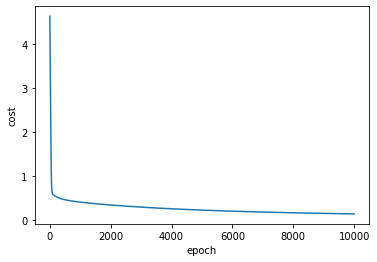

In [63]:
plt.plot(vcost) 
plt.xlabel('epoch') 
plt.ylabel('cost')

Test !

In [64]:
sess.run(hypothesis,feed_dict={X:[[5,3]]} )

array([[0.94079405]], dtype=float32)

In [65]:
sess.run(predicted,feed_dict={X:[[5,3]]} )

array([[1.]], dtype=float32)

In [66]:
sess.run(hypothesis,feed_dict={X:[[4,3]]} )

array([[0.78332686]], dtype=float32)

In [67]:
sess.run(predicted,feed_dict={X:[[4,3]]} )

array([[1.]], dtype=float32)

In [68]:
sess.run(hypothesis,feed_dict={X:[[1,0.2]]} )

array([[0.01687365]], dtype=float32)